# LBA
## CS156 // Prof. Sterne
## Soren Gran // Dec. 21, 2018

In [64]:
# first we have to import and resize the image
# this code was taken from https://pypi.org/project/python-resize-image/,
# with a few small adjustments of my own (the for loop and paths)
import os

from PIL import Image

from resizeimage import resizeimage

path = 'cs156lbadata'
new_path = 'cs156lbadataresized'
for file in os.listdir(path):
    with open(path+'/'+file, 'r+b') as f:
        with Image.open(f) as image:
            cover = resizeimage.resize_cover(image, [512, 512])
            cover.save(new_path+'/'+file, image.format)

In [33]:
# now lets convert our images into processible data
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

data = []

path = 'cs156lbadataresized'
for file in os.listdir(path):
    with Image.open(path+'/'+file).convert('L') as image:
    # this code somewhat taken from
    # https://stackoverflow.com/questions/40727793/how-to-convert-a-grayscale-image-into-a-list-of-pixel-values
        datapoint = list(image.getdata())
        data.append(datapoint)

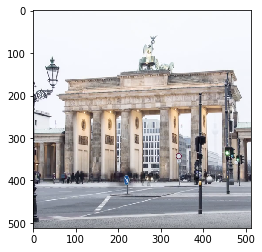

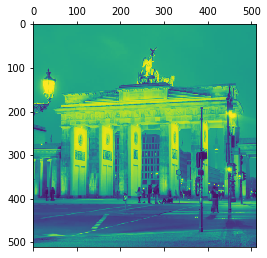

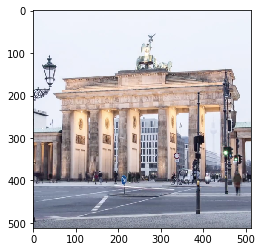

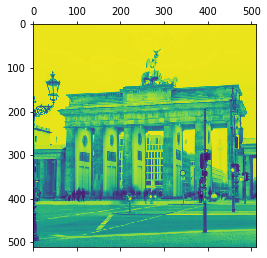

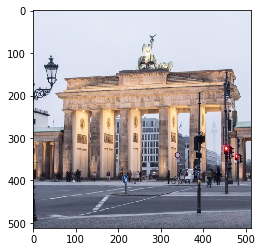

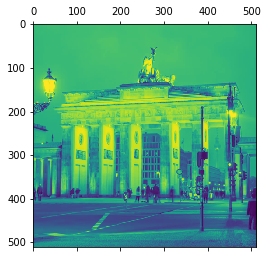

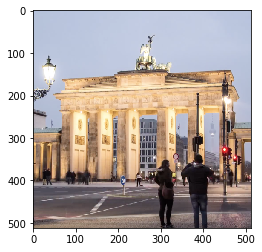

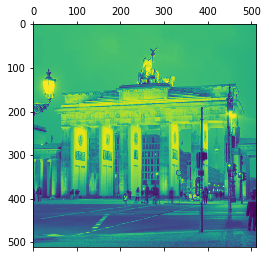

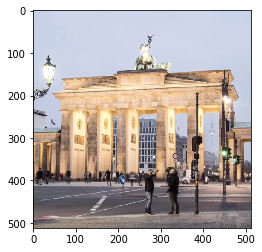

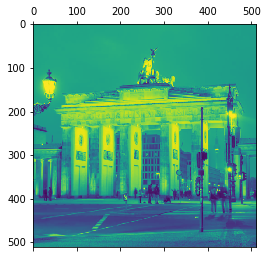

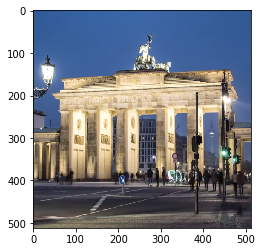

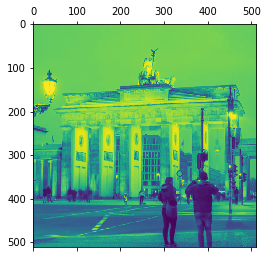

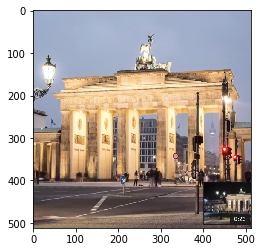

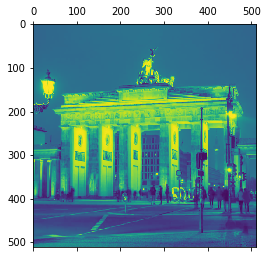

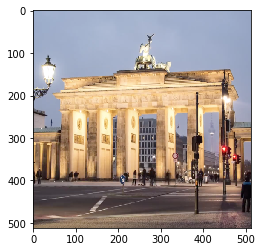

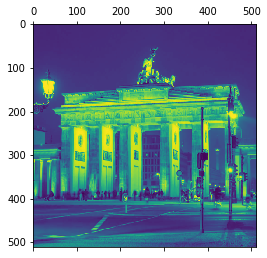

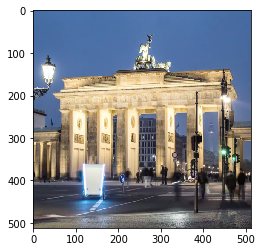

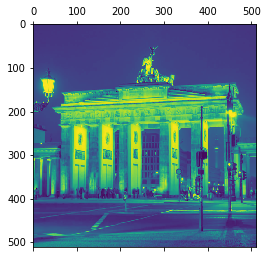

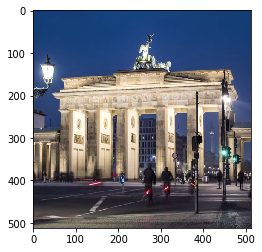

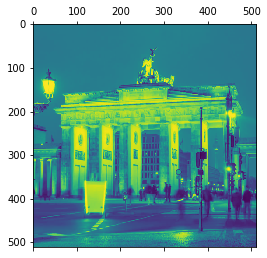

In [63]:
# now lets display a couple images to see how they look next to their counterparts
size = (512,512) # size of the image
# following code taken from https://stackoverflow.com/questions/35286540/display-an-image-with-python
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for i in range(1,11):
    img=mpimg.imread('cs156lbadataresized/' + str(i) + '.png')
    imgplot = plt.imshow(img)
    plt.show()
    plt.matshow(np.reshape(data[i-1],size))
    plt.show()
    
# my images went from being light outside to being dark
# these images seem to be negatives since the sky appears
# to get lighter.

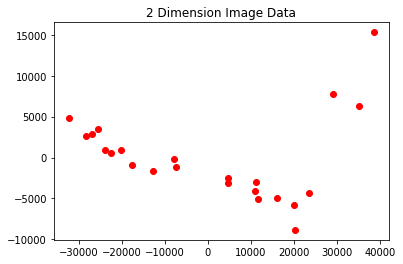

In [47]:
# now let's reduce some dimensions
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

dimensions = 2 # we want to reduce to 2 dimensions

pca = PCA(n_components=dimensions)
results = pca.fit_transform(data) # this function both fits the data
# and reduces its dimensionality

# scatter plot time
# we are just plotting the dimensionally-reduced data, which tells us
# basically nothing as humans. However, it allows us to identify a
# 2-dimensional datapoint that is far from our images.
xs = []
ys = []
for i in results:
    x, y = i[0], i[1]
    xs.append(x)
    ys.append(y)

plt.plot(xs, ys, 'ro')
plt.title('2 Dimension Image Data')
plt.show()

# what is a far-away point?
# (0, 15000) looks good
# It seems like there is a trend, since the data seems to
# curve down from 5000 to -5000 and then curves steeply
# back up from -5000 to 15000.

/Users/sorengran/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


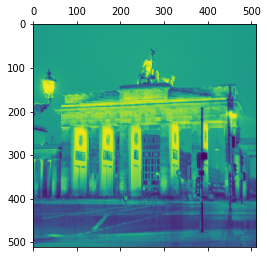

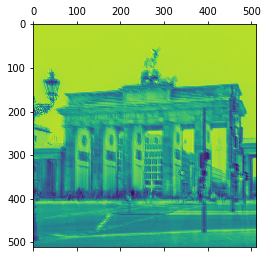

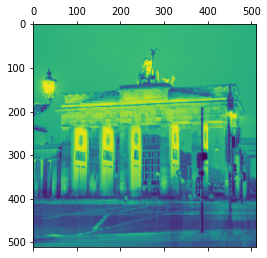

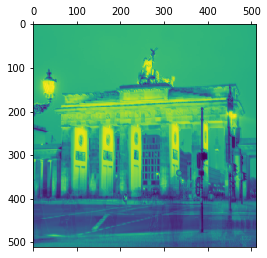

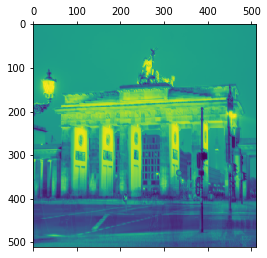

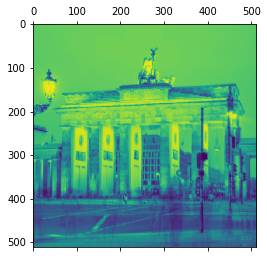

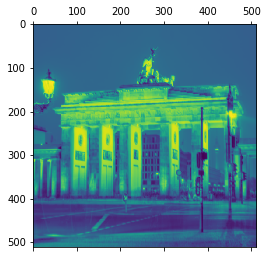

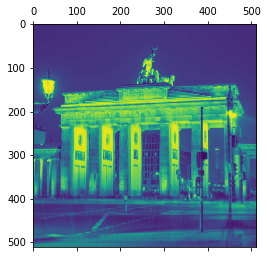

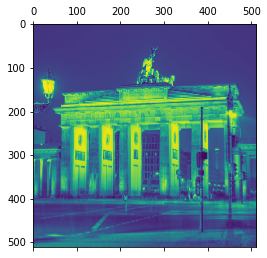

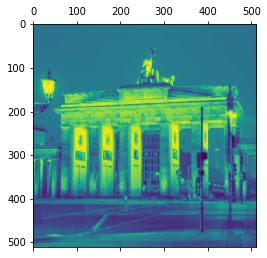

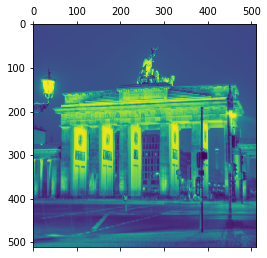

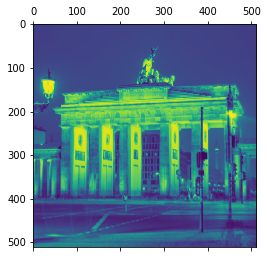

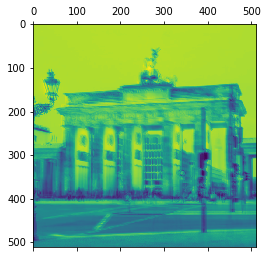

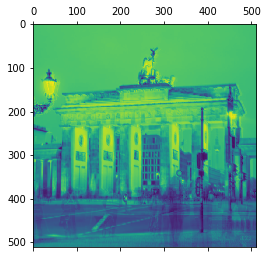

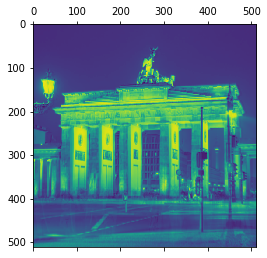

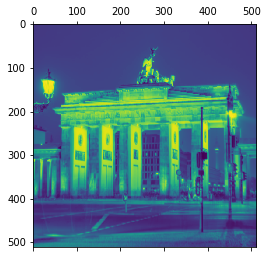

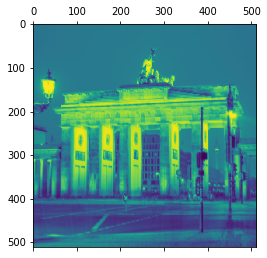

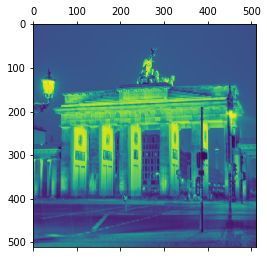

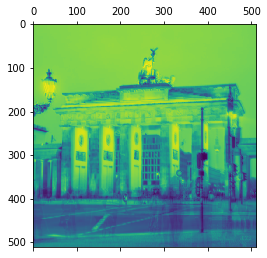

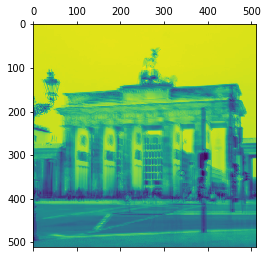

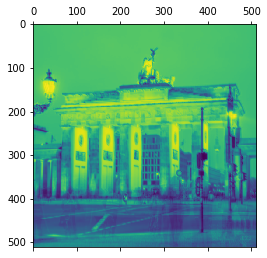

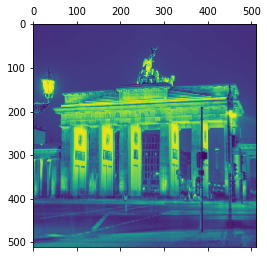

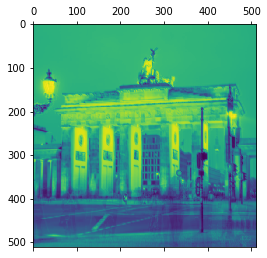

In [55]:
size = (512,512)
for i in range(len(results)):
    plt.matshow(np.reshape(pca.inverse_transform(results)[i],size))

# How do they look?
# Great! What I notice, in general, is that all noise has been removed,
# which is fascinating. There are no more cars or people (just occasional
# blur, like heat coming off a road). This makes sense to me, since
# when we fit our PCA, it focuses on the recurring parts of the images,
# since these would be considered most important during dimensionality
# reduction. Therefore, noisy variables like people in cars, which do not
# usually appear in the same place, are ignored.


# On a different, less academic note, this reminsd me of a photography
# technique described here:
# https://digital-photography-school.com/taking-photos-in-busy-tourist-destinations-with-no-people-in-the-shot/
# While this photographer uses different techniques, just erasing things
# that don't appear twice, these techniques obtain similar results and
# are conceptually similar.

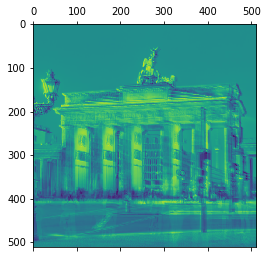

In [46]:
point = (0, 15000)
# I chose (0, 15000) simply because it was far from the data
# on the scatter plot I created.
plt.matshow(np.reshape(pca.inverse_transform(point),size))

# The result is still an extremely recognizable image of the
# Brandenburg Gate. Overall, it is much blurrier than my
# images, but it is still pretty recognizable. I think my
# PCA performed so well because the images I fed it were very
# similar in that I was careful about taking them from the same
# place. Even though it got darker, the shapes still existed
# despite the changing light. So even though the light shifted,
# the pixels still held similar patterns because the shapes
# remained constant. This trained the PCA strongly on the shapes,
# making it easy for PCA to reproduce images.